###  auto_mpg에 들어있는 컬럼에 따른 mpg 예측
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 : 모든 컬럼
- 타겟:  mpg

In [3]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

In [4]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv'))
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', 'nan')
mpgDF = mpgDF.ffill()

In [5]:
mpgDF.shape

(404, 9)

In [6]:
mpgDF.loc[ (i for i in range(404)), 'car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
399                   chevy s-10
400              ford mustang gl
401                    vw pickup
402               ford granada l
403             toyota celica gt
Name: car name, Length: 404, dtype: object

In [7]:
mpgDF['company'] = [*mpgDF.loc[ (i for i in range(404)), 'car name']]

In [8]:
mpgDF['company'] = mpgDF['company'].apply(lambda x: x.split()[0])

In [9]:
mpgDF['horsepower'] = mpgDF['horsepower'].astype(float)

In [10]:
newDF = mpgDF.drop(columns='car name')
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           404 non-null    float64
 1   cylinders     404 non-null    float64
 2   displacement  404 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        404 non-null    float64
 5   acceleration  404 non-null    float64
 6   model year    404 non-null    int64  
 7   origin        404 non-null    int64  
 8   company       404 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.5+ KB


In [11]:
newDF.isna().sum()
newDF['horsepower'] = newDF['horsepower'].ffill()

In [12]:
newDF['horsepower'].isna().sum()

np.int64(0)

Axes(0.125,0.53;0.168478x0.35)


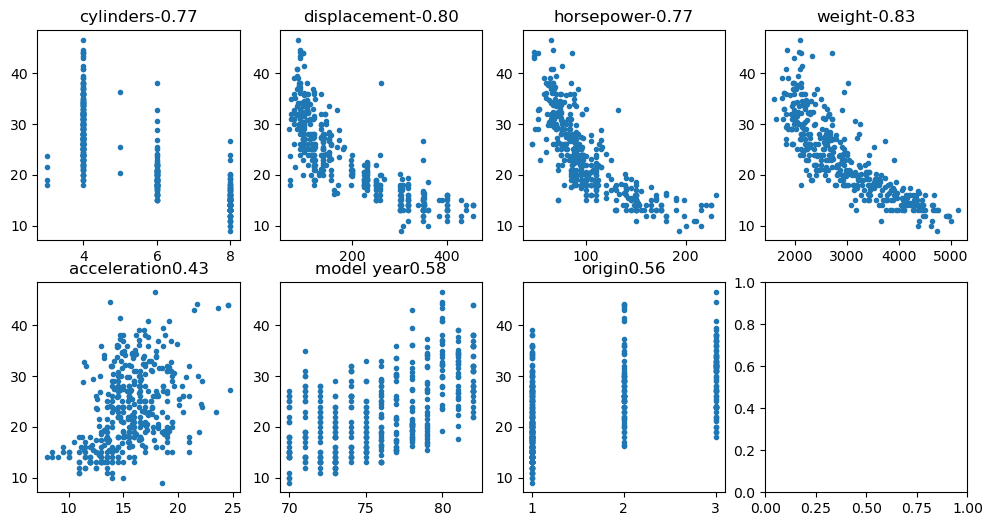

In [13]:
fig, ax = plt.subplots(2,4, figsize = (12,6))
ax = ax.flatten()
print(ax[0])
for i in range(0,7):
    ax[i].plot(newDF.iloc[:,i+1],newDF['mpg'], '.')
    ax[i].set_title(newDF.columns[i+1]+ str(f"{newDF.iloc[:,i+1].corr(newDF['mpg']):.2f}"))
    


mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight

In [14]:
# feature = newDF[['cylinders', 'displacement','horsepower','weight']]
# feature = newDF[['cylinders', 'displacement','horsepower','weight','model year']]
feature = newDF[['weight']]
# feature = newDF[['acceleration', 'model year','origin']]
target = newDF['mpg']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [21]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [22]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,) / y_test => 2D, (101,)


In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [-0.00745747]
lr.intercept_ 45.50452948286962
X_train = -0.007457473126309953*y_train + 45.50452948286962


[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [25]:

pre_y = lr.predict(X_train)
score = lr.score(X_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 4.22375800711625


In [26]:

pre_y = lr.predict(X_test)
score = lr.score(X_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 5.007971759350178


[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [31]:
## - 모델이 결정한 선형식기반 결과 예측
pre_mpg = lr.predict(feature)

# # 모델 예측값과 정답의 차이계산
# mse = mean_squared_error(feature, pre_mpg)
# #오차평균

# mae = mean_absolute_error(feature,pre_mpg)

In [32]:
feature

,cylinders,displacement,horsepower,weight,model year
0,8.0,307.0,130.0,3504.0,70
1,8.0,350.0,165.0,3693.0,70
2,8.0,318.0,150.0,3436.0,70
3,8.0,304.0,150.0,3433.0,70
4,8.0,302.0,140.0,3449.0,70
...,...,...,...,...,...
399,4.0,119.0,82.0,2720.0,82
400,4.0,140.0,86.0,2720.0,82
401,4.0,97.0,86.0,2720.0,82
402,6.0,232.0,86.0,2835.0,82


In [33]:
# new_data = [[6, 250, 100, 3000]]
new_data = [[6, 250, 100, 3000,  80]]

pre_mpg = lr.predict(new_data)

print(f" 예상 mpg는 {pre_mpg}입니다 ")

 예상 mpg는 [26.01386966]입니다 


c:\Users\matdo\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
feature.head()

,cylinders,displacement,horsepower,weight,model year
0,8.0,307.0,130.0,3504.0,70
1,8.0,350.0,165.0,3693.0,70
2,8.0,318.0,150.0,3436.0,70
3,8.0,304.0,150.0,3433.0,70
4,8.0,302.0,140.0,3449.0,70


In [35]:
#과대적합의심되므로 컬럼조정
# rm과 lstat의 정규화ㅣ
nmpgDF = newDF.copy()

In [36]:
# for i in nmpgDF.index:
#     if nmpgDF.loc[i,'cylinders'] > 1.3*(sum(nmpgDF['cylinders'])/len(nmpgDF['cylinders'])):
#         nmpgDF.loc[i,'cylinders'] = 1.3*(sum(nmpgDF['cylinders'])/len(nmpgDF['cylinders']))
#     elif nmpgDF.loc[i,'cylinders'] < 0.7*(sum(nmpgDF['cylinders'])/len(nmpgDF['cylinders'])):
#         nmpgDF.loc[i,'cylinders'] = 0.7*(sum(nmpgDF['cylinders'])/len(nmpgDF['cylinders']))


In [37]:
# for i in nmpgDF.index:
#     if nmpgDF.loc[i,'displacement'] > 1.5*(sum(nmpgDF['displacement'])/len(nmpgDF['displacement'])):
#         nmpgDF.loc[i,'displacement'] = 1.5*(sum(nmpgDF['displacement'])/len(nmpgDF['displacement']))
#     elif nmpgDF.loc[i,'displacement'] < 0.5*(sum(nmpgDF['displacement'])/len(nmpgDF['displacement'])):
#         nmpgDF.loc[i,'displacement'] = 0.5*(sum(nmpgDF['displacement'])/len(nmpgDF['displacement']))


In [38]:
# for i in nmpgDF.index:
#     if nmpgDF.loc[i,'horsepower'] > 1.5*(sum(nmpgDF['horsepower'])/len(nmpgDF['horsepower'])):
#         nmpgDF.loc[i,'horsepower'] = 1.5*(sum(nmpgDF['horsepower'])/len(nmpgDF['horsepower']))
#     elif nmpgDF.loc[i,'horsepower'] < 0.5*(sum(nmpgDF['horsepower'])/len(nmpgDF['horsepower'])):
#         nmpgDF.loc[i,'horsepower'] = 0.5*(sum(nmpgDF['horsepower'])/len(nmpgDF['horsepower']))


In [39]:
# for i in nmpgDF.index:
#     if nmpgDF.loc[i,'weight'] > 1.5*(sum(nmpgDF['weight'])/len(nmpgDF['weight'])):
#         nmpgDF.loc[i,'weight'] = 1.5*(sum(nmpgDF['weight'])/len(nmpgDF['weight']))
#     elif nmpgDF.loc[i,'weight'] < 0.5*(sum(nmpgDF['weight'])/len(nmpgDF['weight'])):
#         nmpgDF.loc[i,'weight'] = 0.5*(sum(nmpgDF['weight'])/len(nmpgDF['weight']))


In [40]:
# for i in nmpgDF.index:
#     if nmpgDF.loc[i,'mpg'] > 1.5*(sum(nmpgDF['mpg'])/len(nmpgDF['mpg'])):
#         nmpgDF.loc[i,'mpg'] = 1.5*(sum(nmpgDF['mpg'])/len(nmpgDF['mpg']))
#     elif nmpgDF.loc[i,'mpg'] < 0.5*(sum(nmpgDF['mpg'])/len(nmpgDF['mpg'])):
#         nmpgDF.loc[i,'mpg'] = 0.5*(sum(nmpgDF['mpg'])/len(nmpgDF['mpg']))


In [41]:
# feature = nmpgDF[['horsepower','weight']]
feature = nmpgDF[['cylinders', 'displacement','horsepower','weight','model year']]

target = nmpgDF['mpg']

In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 샘플 데이터

# Min-Max 정규화 적용
scaler = MinMaxScaler()
feature= scaler.fit_transform(feature)

print(feature)

[[1.         0.61757106 0.45652174 0.5361497  0.        ]
 [1.         0.72868217 0.64673913 0.58973632 0.        ]
 [1.         0.64599483 0.56521739 0.51686986 0.        ]
 ...
 [0.2        0.0749354  0.2173913  0.31386447 1.        ]
 [0.6        0.42377261 0.2173913  0.34647009 1.        ]
 [0.2        0.19638243 0.27173913 0.29827048 1.        ]]


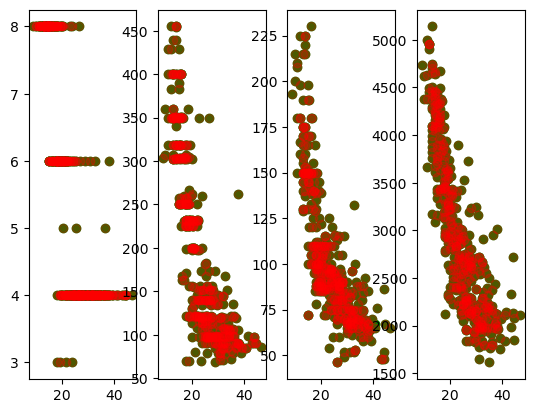

In [44]:
fig, ax = plt.subplots(1,4, sharex=True)
# ax = np.flatten(ax)
# ax2 = plt.twiny(ax)
ax[ 0].plot(nmpgDF['mpg'], nmpgDF['cylinders'], 'og')
ax[ 0].plot(mpgDF['mpg'], mpgDF['cylinders'], 'or', alpha=0.3)

ax[1].plot(nmpgDF['mpg'], nmpgDF['displacement'], 'og')
ax[1].plot(mpgDF['mpg'], mpgDF['displacement'], 'or', alpha=0.3)

ax[2].plot(nmpgDF['mpg'], nmpgDF['horsepower'], 'og')
ax[2].plot(mpgDF['mpg'], mpgDF['horsepower'], 'or', alpha=0.3)

ax[3].plot(nmpgDF['mpg'], nmpgDF['weight'], 'og')
ax[3].plot(mpgDF['mpg'], mpgDF['weight'], 'or', alpha=0.3)


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [45]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [46]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 5) / X_test => 2D, (101, 5)
y_train => 1D (303,) / y_test => 2D, (101,)


In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ -3.117038     1.39744091   0.47241561 -20.68983948   8.89021289]
lr.intercept_ 27.816065470190992
X_train = -3.1170379995123056*y_train + 27.816065470190992


[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [49]:

pre_y = lr.predict(X_train)
score = lr.score(X_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 3.256839821820106


In [50]:

pre_y = lr.predict(X_test)
score = lr.score(X_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 4.172434250010923


In [52]:
## 모듈화
r_dict = {x:[] for x in ['score', 'rmse', 'mse', 'mae']}
for x, y in [[X_train, y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.8142634943398552, 0.7510848431349413],
 'rmse': [3.256839821820106, 4.172434250010923],
 'mse': [10.607005624993219, 17.409207570664215],
 'mae': [2.473065778268081, 3.160103386547171]}

In [57]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,rmse,mse,mae
train,0.8143,3.2568,10.6070,2.4731
test,0.7511,4.1724,17.4092,3.1601
diff,0.0632,0.9156,6.8022,0.6870


[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [53]:
## - 모델이 결정한 선형식기반 결과 예측
pre_mpg = lr.predict(feature)


In [54]:
feature

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.        ],
       [1.        , 0.64599483, 0.56521739, 0.51686986, 0.        ],
       ...,
       [0.2       , 0.0749354 , 0.2173913 , 0.31386447, 1.        ],
       [0.6       , 0.42377261, 0.2173913 , 0.34647009, 1.        ],
       [0.2       , 0.19638243, 0.27173913, 0.29827048, 1.        ]])

In [55]:
new_data = [[6,250, 120, 3000, 80]]

pre_mpg = lr.predict(new_data)

print(f" 예상 mpg 는 {pre_mpg}입니다 ")

 예상 mpg 는 [-60943.13746151]입니다 
